In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

# Problem 1

In [80]:
num_samples = 10

x = np.linspace(0, 1, num_samples)

y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, num_samples)

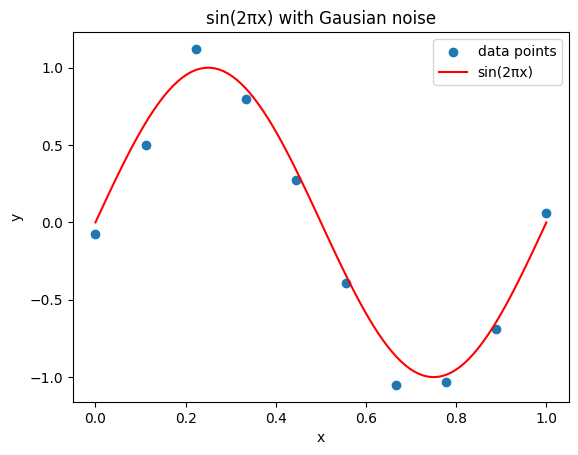

In [81]:
plt.scatter(x, y, label='data points')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='red', linestyle='-', label='sin(2πx)')

plt.title('sin(2πx) with Gausian noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Problem 2

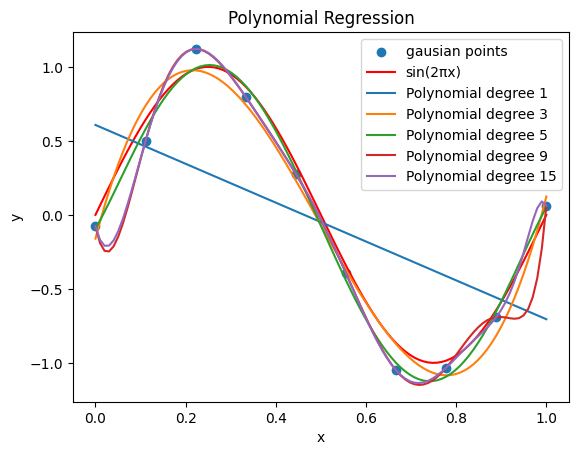

In [82]:
plt.scatter(x, y, label='gausian points')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='red', linestyle='-', label='sin(2πx)')

smooth_x = np.linspace(0, 1, 100)
for degree in [1, 3, 5, 9, 15]:
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(polynomial_features.transform(smooth_x.reshape(-1, 1)))
    plt.plot(smooth_x, y_poly_pred, label=f'Polynomial degree {degree}')
    
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Problem 3

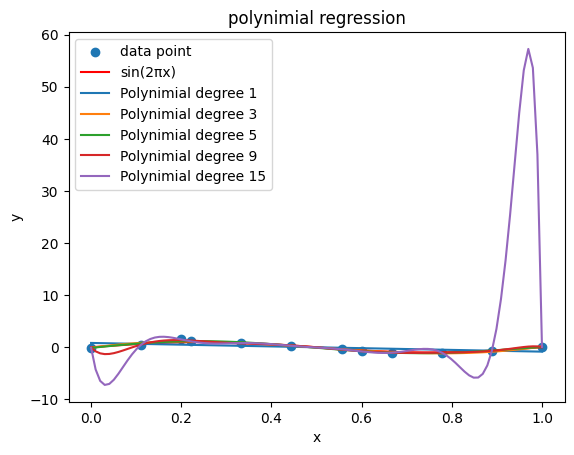

In [83]:
x_outliers = np.array([0.2, 0.6])
y_outliers = np.array([1.5, -0.8])
x = np.concatenate([x, x_outliers])
y = np.concatenate([y, y_outliers])

plt.scatter(x, y, label='data point')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='red', linestyle='-', label='sin(2πx)')

smooth_x = np.linspace(0, 1, 100)
for degree in [1, 3, 5, 9, 15]:
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(polynomial_features.transform(smooth_x.reshape(-1, 1)))
    plt.plot(smooth_x, y_poly_pred, label=f'Polynimial degree {degree}')
    
plt.title('polynimial regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Problem 4

In [84]:
# fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# axs[0].scatter(x, y, label='data point')
# axs[0].plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='red', linestyle='-', label='sin(2πx)')
# axs[0].set_title('L2 regression')
# axs[0].set_xlabel('x')
# axs[0].set_ylabel('y')

# smooth_x = np.linspace(0, 1, 100)
# for alpha in [0.1, 1, 10, 100]:
#     for degree in [9, 15]:
#         polynomial_features = PolynomialFeatures(degree=degree)
#         x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
#         ridge_model = Ridge(alpha=alpha)
#         ridge_model.fit(x_poly, y)
#         y_poly_pred_ridge = ridge_model.predict(polynomial_features.transform(smooth_x.reshape(-1, 1)))
#         label_ridge = f'L2(λ={alpha}) degree {degree}'
#         axs[0].plot(smooth_x, y_poly_pred_ridge, label=label_ridge)

# axs[0].legend()

# axs[1].scatter(x, y, label='data point')
# axs[1].plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='red', linestyle='-', label='sin(2πx)')
# axs[1].set_title('L1 regression')
# axs[1].set_xlabel('x')
# axs[1].set_ylabel('y')

# for alpha in [0.1, 1, 10, 100]:
#     for degree in [9, 15]:
#         polynomial_features = PolynomialFeatures(degree=degree)
#         x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
#         lasso_model = Lasso(alpha=alpha)
#         lasso_model.fit(x_poly, y)
#         y_poly_pred_lasso = lasso_model.predict(polynomial_features.transform(smooth_x.reshape(-1, 1)))
#         label_lasso = f'L1(λ={alpha}) degree {degree}'
#         axs[1].plot(smooth_x, y_poly_pred_lasso, label=label_lasso)

# axs[1].legend()

# plt.show()

### 좀 더 세분화

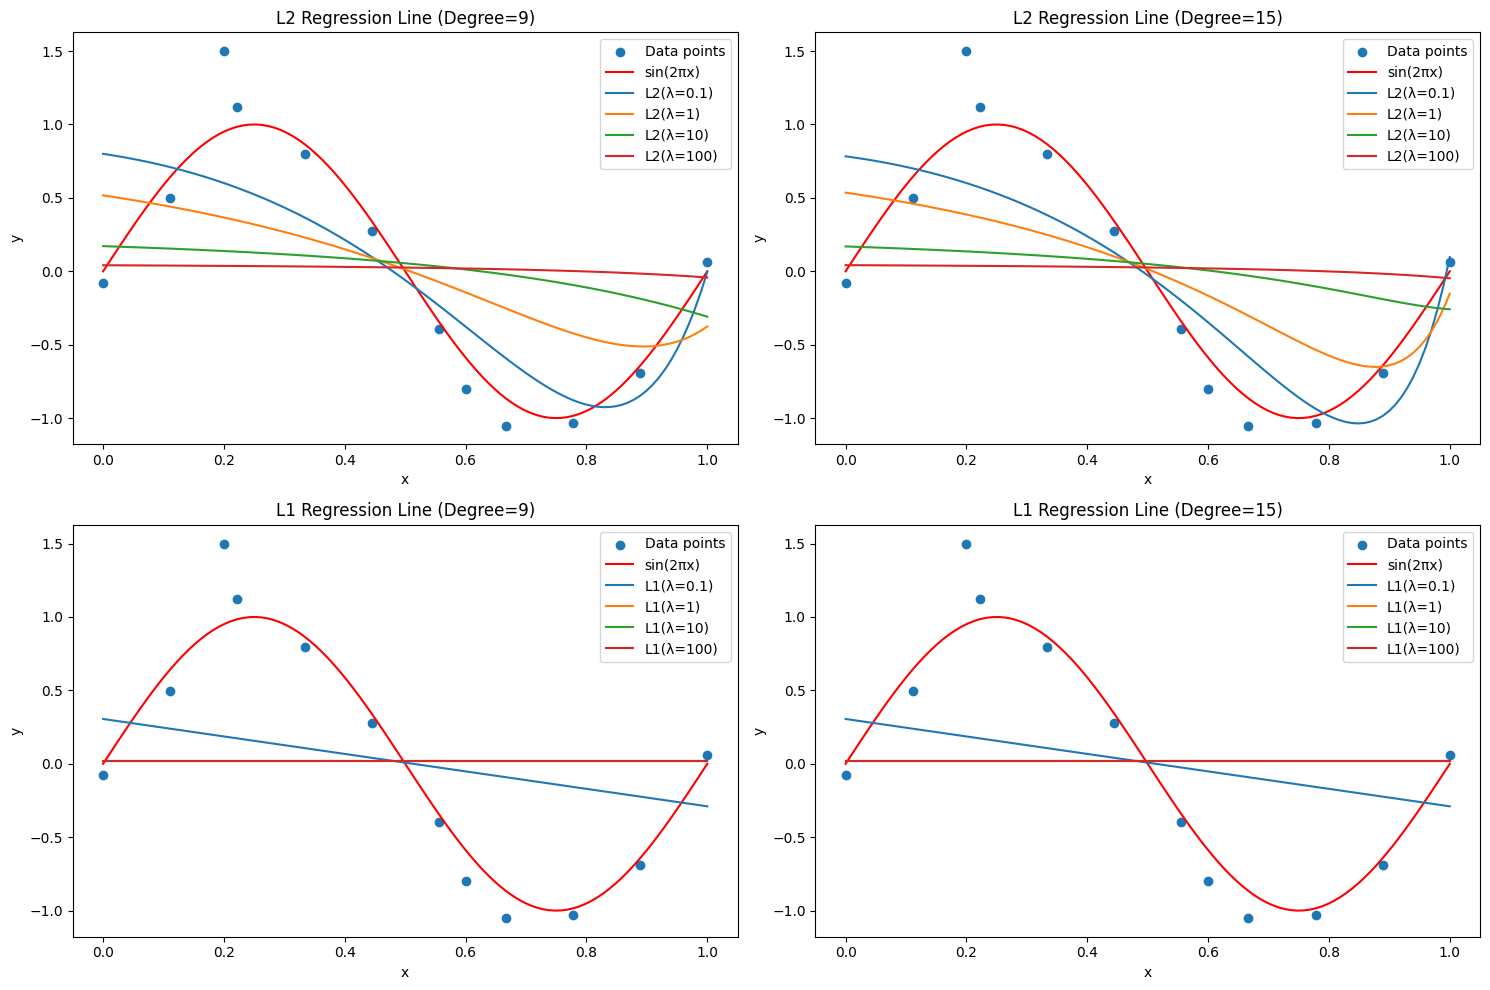

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, degree in enumerate([9, 15]):
    axs[0, i].scatter(x, y, label='Data points')
    axs[0, i].plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='red', linestyle='-', label='sin(2πx)')
    axs[0, i].set_title(f'L2 Regression Line (Degree={degree})')
    axs[0, i].set_xlabel('x')
    axs[0, i].set_ylabel('y')

    smooth_x = np.linspace(0, 1, 100)
    for alpha in [0.1, 1, 10, 100]:
        polynomial_features = PolynomialFeatures(degree=degree)
        x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_poly, y)
        y_poly_pred_ridge = ridge_model.predict(polynomial_features.transform(smooth_x.reshape(-1, 1)))
        label_ridge = f'L2(λ={alpha})'
        axs[0, i].plot(smooth_x, y_poly_pred_ridge, label=label_ridge)

    axs[0, i].legend()

for i, degree in enumerate([9, 15]):
    axs[1, i].scatter(x, y, label='Data points')
    axs[1, i].plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='red', linestyle='-', label='sin(2πx)')
    axs[1, i].set_title(f'L1 Regression Line (Degree={degree})')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('y')

    smooth_x = np.linspace(0, 1, 100)
    for alpha in [0.1, 1, 10, 100]:
        polynomial_features = PolynomialFeatures(degree=degree)
        x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(x_poly, y)
        y_poly_pred_lasso = lasso_model.predict(polynomial_features.transform(smooth_x.reshape(-1, 1)))
        label_lasso = f'L1(λ={alpha})'
        axs[1, i].plot(smooth_x, y_poly_pred_lasso, label=label_lasso)

    axs[1, i].legend()

plt.tight_layout()
plt.show()

# Problem 5

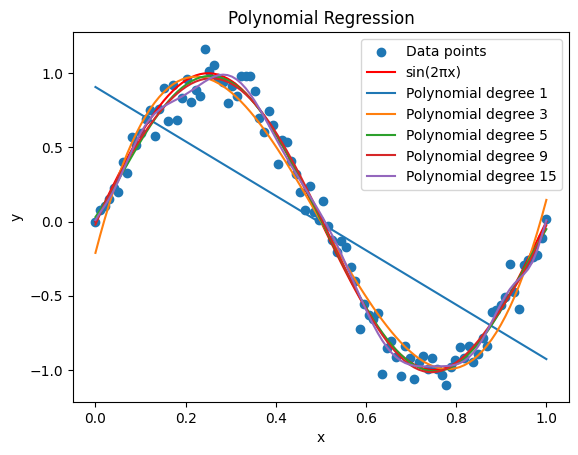

In [86]:
num_samples = 100

x = np.linspace(0, 1, num_samples)

y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, num_samples)

plt.scatter(x, y, label='Data points')
plt.plot(np.linspace(0, 1, 100), np.sin(2 * np.pi * np.linspace(0, 1, 100)), color='red', linestyle='-', label='sin(2πx)')

smooth_x = np.linspace(0, 1, 100)
for degree in [1, 3, 5, 9, 15]:
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(polynomial_features.transform(smooth_x.reshape(-1, 1)))
    plt.plot(smooth_x, y_poly_pred, label=f'Polynomial degree {degree}')
    
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()